# INFORME 4 - Rodriguez María Eugenia.

### 1. Introducción.

En este informe implementamos distintos conceptos y técnicas estudiadas, relacionados con la inferencia estadística, ajuste de funciones y selección de parámetros para un dado modelo. Las actividades realizadas fueron:
* Inferencia Bayesiana, para realizar el ajuste de un modelo paramérico a un conjunto de datos.
* Exploración del espacio de parámetros para estimar la función Probabilidad Posterior usando Cadenas de Markov Monte Carlo (MCMC).
* Implementación del algoritmo de Metrópolis-Hastings para llevar a cabo realizaciones de MCMC.
* Minimización de funciones, mediante la técnica del gradiente descendente.

Los datos utilizados en el informe fueron tomados del paper de Balton et al. (2001), descargados desde el aula virtual de la materia. La tabla contiene información acerca de las magnitudes de las galaxias por unidad de $Mpc^3$, la luminosidad de las galaxias por unidad de $Mpc^3$ y sus correspondientes errores.

### 2. Desarrollo y resultados.

Comenzamos graficando los datos, con sus respectivos errores, pertenecientes a la función de luminosidad de galaxias obtenida por Blanton et al. (2001). Los datos correspondientes se descargaron del aula virtual.

In [1]:
import pandas as pd

In [2]:
#pd.read_csv?

In [3]:
a=pd.read_csv("datos.csv", skipinitialspace=True) #para leer la tabla como csv
a

,MAG,PHI,error_inf,error_sup
0,-23.183,0.000003,0.000002,0.000003
1,-23.020,0.000005,0.000003,0.000005
2,-22.870,0.000017,0.000005,0.000009
3,-22.698,0.000035,0.000009,0.000010
4,-22.565,0.000082,0.000024,0.000023
5,-22.411,0.000122,0.000017,0.000020
6,-22.248,0.000241,0.000034,0.000040
7,-22.096,0.000328,0.000038,0.000043
8,-21.942,0.000504,0.000059,0.000084
9,-21.793,0.000933,0.000133,0.000091


In [4]:
x=a['MAG'].values
x

array([-23.183, -23.02 , -22.87 , -22.698, -22.565, -22.411, -22.248,
       -22.096, -21.942, -21.793, -21.638, -21.484, -21.311, -21.176,
       -21.011, -20.857, -20.703, -20.56 , -20.412, -20.241, -20.098,
       -19.934, -19.78 , -19.634, -19.478, -19.308, -19.165, -19.006,
       -18.863, -18.698, -18.539, -18.407, -18.243, -18.089, -17.924,
       -17.765, -17.628, -17.466, -17.32 , -17.166, -17.002, -16.848,
       -16.7  , -16.557, -16.402, -16.232, -16.081])

In [5]:
#es la función luminosidad
y=a['PHI'].values
y

array([2.8500e-06, 5.2800e-06, 1.7040e-05, 3.4600e-05, 8.2000e-05,
       1.2233e-04, 2.4087e-04, 3.2756e-04, 5.0396e-04, 9.3293e-04,
       1.2687e-03, 1.7253e-03, 2.5731e-03, 3.1906e-03, 3.8341e-03,
       5.0559e-03, 5.5388e-03, 6.4562e-03, 7.2960e-03, 8.5022e-03,
       9.6081e-03, 9.8966e-03, 1.0844e-02, 1.2255e-02, 1.3019e-02,
       1.3409e-02, 1.5628e-02, 1.4676e-02, 1.5118e-02, 1.8170e-02,
       1.6542e-02, 1.6024e-02, 1.8673e-02, 2.0778e-02, 1.6981e-02,
       1.8604e-02, 1.9768e-02, 2.5271e-02, 2.7690e-02, 3.0341e-02,
       2.1581e-02, 2.6753e-02, 2.7560e-02, 3.6340e-02, 6.7273e-02,
       1.6250e-02, 5.7516e-02])

In [6]:
yerrorsup=a['error_sup'].values
yerrorsup

array([3.2300e-06, 5.4600e-06, 9.2100e-06, 9.6900e-06, 2.2980e-05,
       2.0410e-05, 4.0220e-05, 4.3030e-05, 8.4140e-05, 9.0680e-05,
       2.1182e-04, 2.5723e-04, 2.4991e-04, 4.1865e-04, 3.7238e-04,
       4.9034e-04, 5.3795e-04, 6.2615e-04, 7.0760e-04, 8.2459e-04,
       1.0957e-03, 9.5981e-04, 1.4245e-03, 1.1860e-03, 1.2626e-03,
       2.2367e-03, 1.5178e-03, 2.4481e-03, 2.5219e-03, 2.3868e-03,
       2.1730e-03, 2.6753e-03, 3.1148e-03, 4.6146e-03, 3.4535e-03,
       3.1061e-03, 3.2976e-03, 5.1414e-03, 5.6357e-03, 7.3147e-03,
       3.6000e-03, 5.4409e-03, 8.8169e-03, 1.3135e-02, 3.0158e-02,
       2.6045e-02, 5.9439e-02])

In [7]:
yerrorinf=a['error_inf'].values
yerrorinf

array([1.5700e-06, 2.6000e-06, 4.5300e-06, 9.1900e-06, 2.3600e-05,
       1.7490e-05, 3.4450e-05, 3.8030e-05, 5.8620e-05, 1.3332e-04,
       1.4731e-04, 2.0051e-04, 3.6772e-04, 2.8245e-04, 3.3897e-04,
       7.2364e-04, 6.4248e-04, 7.4961e-04, 8.4711e-04, 7.5266e-04,
       1.1156e-03, 1.6726e-03, 1.2603e-03, 1.7527e-03, 1.6885e-03,
       1.5569e-03, 2.2342e-03, 1.7056e-03, 1.3366e-03, 2.5976e-03,
       1.9188e-03, 2.7080e-03, 2.1659e-03, 3.2432e-03, 2.4276e-03,
       3.1442e-03, 4.3240e-03, 4.2708e-03, 4.6797e-03, 5.8938e-03,
       5.7295e-03, 8.2810e-03, 9.1066e-03, 1.0459e-02, 1.7854e-02,
       1.0379e-02, 2.7429e-02])

In [8]:
import matplotlib.pyplot as plt 

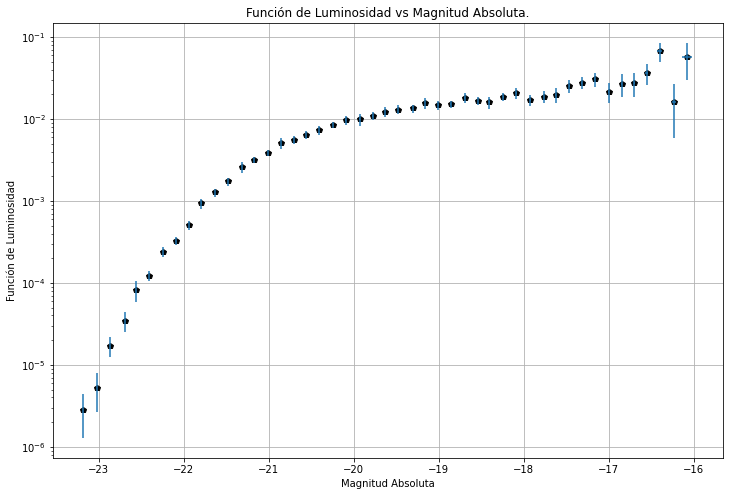

In [9]:
plt.figure(figsize = (12,8))
plt.plot(x,y,'p', color='k')
plt.errorbar(x,y,yerrorinf,yerrorsup,ls='None')
#plt.plot(x,yerrorsup)
plt.yscale('log')
plt.ylabel('Función de Luminosidad')
plt.xlabel('Magnitud Absoluta')
plt.title('Función de Luminosidad vs Magnitud Absoluta.')
plt.grid()
#plt.legend(loc='lower right',fontsize=10)

plt.show()

A continación le ajustamos a los datos el modelo de la función de Schechter, el cual utiliza los valores encontrados por Blanton para cada uno de los parámetros:
* $\phi_*$=h=0.014 
* $M_*$=m=-20.83
* $\alpha$=k=-1.2

In [10]:
import numpy as np

h=$\phi_*$, m=$M_*$, k=$\alpha$, sigma=$\sigma$

In [11]:
#modelo
def model(x,h,m,k):
    lista=[]
    for i in range(len(x)):
        y=0.4 * np.log(10) * h * (10**(-0.4*(x[i]-m)*(k+1))) * np.exp(-10**(-0.4*(x[i]-m))) #schechter
        lista.append(y)
    return lista

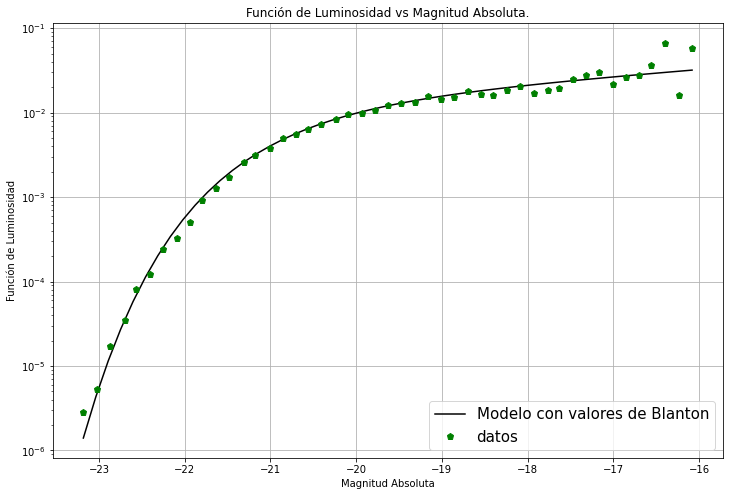

In [12]:
#rango de x
sx = np.linspace(min(x),max(x))
#valores de Blanton et al. (2001)
sy = model(sx, h=0.0146, m=-20.83, k=-1.2)

plt.figure(figsize = (12,8))
#grafico con los datos y modelo
plt.plot(sx,sy,color='k', label='Modelo con valores de Blanton')
plt.plot(x,y,'p', color='g', label='datos', ms=7)
plt.yscale('log')
plt.title('Función de Luminosidad vs Magnitud Absoluta.')
plt.ylabel('Función de Luminosidad')
plt.xlabel('Magnitud Absoluta')
plt.legend(loc='lower right',fontsize=15)
plt.grid()
plt.show()

Nuestro objetivo es encontrar los parámetros del modelo y corroborar que coinciden o son cercanos a los determinados por Blanton. Lo realizaremos de dos maneras distintas. La primera es mediante un análisis Bayesiano minimizando la función probabilidad posterior utilizando el algoritmo de Metrópolis-Hastings. Este además nos provee el análisis del espacio de los parámetros. La segunda es utilizando el algoritmo del gradiente descendente que nos devuelve de manera mas directa los valores de los parámetros que queremos.

#### 2.1. Análisis Bayesiano.

Empezamos definiendo y probando la función del logaritmo de Likelihood. Por como estamos trabajando con la función la idea es que se minimice para los valores de Blanton.

In [13]:
#veamos likehood con valores de Blanton y otros diferentes

#asumimos errores gaussianos
sigma= np.abs((yerrorinf - yerrorsup)/2)
#sigma

#defino función de termino que maximiza Likehood
def likelihood(mag,fun,h,m,k,sigma):
    mod = model(mag,h,m,k)
    for i in range(len(x)):
        j=((y[i]-mod[i])**2)/sigma[i]**2
    minim=j.sum()
    return minim

In [14]:
#valores Blanton
likelihood(x,y,0.0146,-20.83,-1.2,sigma)

2.5721001051263794

In [15]:
#valores cualquiera del mismo orden
likelihood(x,y,0.02,-24,-1,sigma)

5.970576349514808

Vemos entonces con este simple ejemplo que los valores dados por Blanton son los correctos pues minimizan la función de Likehood en comparación con otros parámetros arbitrarios del orden. Buscamos minimizar por la manera en que trabajamos los signos de la función, pero lo que se quiere hacer y se hace en el fondo es maximizar la función de Likehood. 

Vamos a estudiar los límites de los parámetros del modelo. Para esto haremos un vector utilizando la herramienta de Numpy llamada linspace que devuelve una referencia a un array de una dimensión cuyos elementos son la secuencia de n valores equidistantes desde inicio hasta fin. Estos intervalos se definen dependiendo de los parámetros de Blanton a modo de referencia y para analizar los rangos de interes de los mismos estudiaremos la gráfica del modelo ajustado a los datos. Para distintos valores de los párametros observaremos como afecta cada párametro a la forma funcional del modelo. 

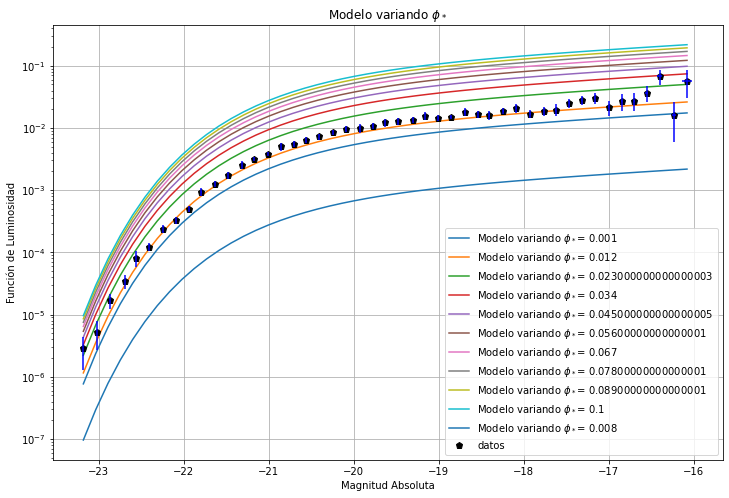

In [16]:
#empezamos variando phi=h
#valor de referencia: h=0.0146

f=np.linspace(0.001,0.1,10)
#f

plt.figure(figsize = (12,8))
sx = np.linspace(min(x),max(x))
for i in range(10):
    sy = model(sx, h=f[i], m=-20.83, k=-1.2)
    plt.plot(sx,sy,label=f'Modelo variando $\phi_*$= {f[i]}')
sy = model(sx, h=0.008, m=-20.83, k=-1.2)
plt.plot(sx,sy,label=f'Modelo variando $\phi_*$= 0.008')    
plt.plot(x,y,'p', color='k', label='datos', ms=7)
plt.errorbar(x,y,yerrorinf,yerrorsup,color='b',ls='None')
plt.yscale('log')
plt.title('Modelo variando $\phi_*$')
plt.ylabel('Función de Luminosidad')
plt.xlabel('Magnitud Absoluta')
plt.legend(loc='lower right',fontsize=10)
plt.grid()
plt.show()

Claramente el parámetro $\phi_*$ varía la altura a la que se posiciona el modelo respecto de los datos.


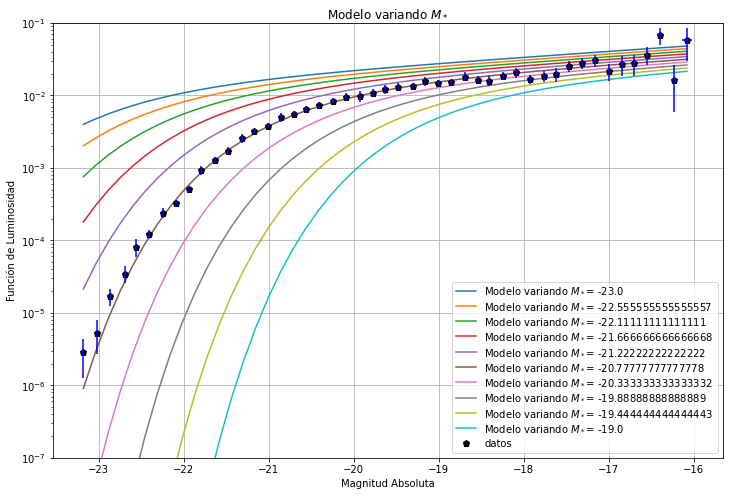

In [17]:
#seguimos con la variación de M_*=m
#valor de referencia: m=-20.83

u=np.linspace(-23,-19,10)
#u

plt.figure(figsize = (12,8))
sx = np.linspace(min(x),max(x))
for i in range(10):
    sy = model(sx, h=0.0146, m=u[i], k=-1.2)
    plt.plot(sx,sy,label=f'Modelo variando $M_*$= {u[i]}')
plt.plot(x,y,'p', color='k', label='datos', ms=7)
plt.errorbar(x,y,yerrorinf,yerrorsup,color='b',ls='None')
plt.yscale('log')
plt.ylim(0.0000001,0.1)
plt.title('Modelo variando $M_*$')
plt.ylabel('Función de Luminosidad')
plt.xlabel('Magnitud Absoluta')
plt.legend(loc='lower right',fontsize=10)
plt.grid()
plt.show()

En el caso del parámetro $M_*$ vemos que su variación implica un cambio notable para las luminosidades mas bajas.

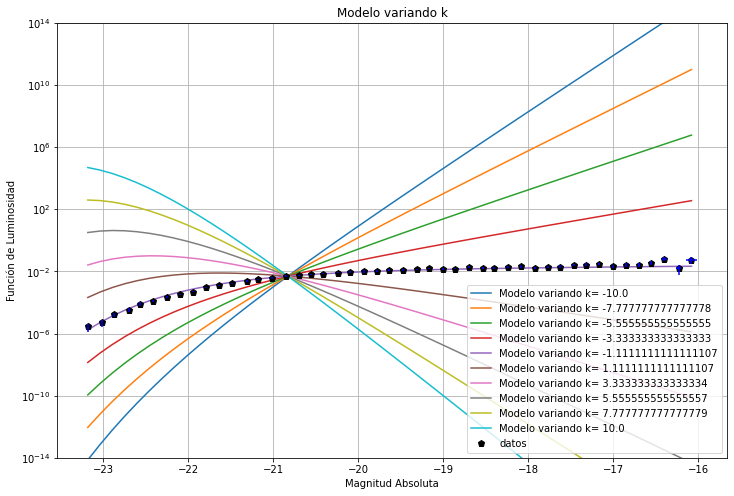

In [18]:
#por último variamos alpha=k
#valor de referencia: k=-1.2

w=np.linspace(-10,10,10)
#w

plt.figure(figsize = (12,8))
sx = np.linspace(min(x),max(x))
for i in range(10):
    sy = model(sx, h=0.0146, m=-20.83, k=w[i])
    plt.plot(sx,sy,label=f'Modelo variando k= {w[i]}')
plt.plot(x,y,'p', color='k', label='datos', ms=7)
plt.errorbar(x,y,yerrorinf,yerrorsup,color='b',ls='None')
plt.yscale('log')
plt.ylim(0.00000000000001,100000000000000)
plt.title('Modelo variando k')
plt.ylabel('Función de Luminosidad')
plt.xlabel('Magnitud Absoluta')
plt.legend(loc='lower right',fontsize=10)
plt.grid()
plt.show()

El parámetro $\alpha$ implica una variación en el codo del modelo.

Observando los gráficos, definimos los límites de cada parámetro:
$\phi_*$=[0.008,0.034];
$M_*$=[-21.22,-20.33];
$\alpha$=[-3.33,1.11]

A continuación definimos las funciones que necesitamos para el análisis Bayesiano 

In [19]:
#límites de cada parámetro (H,m,k)
limsup=np.array([0.034,-20.33 ,1.11])
liminf=np.array([0.008,-21.22,-3.33])

#definimos cada función tomando los logaritmos de cada una
#función Priors
def priors(h,m,k): 
    global limsup,liminf
    params=np.array([h,m,k])
    if np.all((liminf<params) & (params<limsup)):
        return 0
    else:
        return np.inf #porque quiero minimizar
#verificación:
print('verificación para la Priors')
print('valores dentro de los límites devuelve', priors(0.033,-21.12,1))
print('valores fuera de los límites devuelve', priors(4,-21.12,1))

#función de término que minimiza Likehood, también se trabajó con logaritmos
def likelihood(mag,fun,h,m,k,sigma):
    a=[]
    mod = model(mag,h,m,k)
    for i in range(len(x)):
        j=((y[i]-mod[i])**2)/(sigma[i])**2
        a.append(j)
    minim=np.sum(a)/10000   #DIVIDO POR 1000 PARA QUE LA DIFERENCIA ENTRE EL LIK(x) y LIK(x') NO SEA MUY GRANDE Y NEGATIVA => exp(dif) SEA CERANA A CERO Y POR LO TANTO AL SORTEAR ME RECHACE TODOS LOS x' (COMENTARIO PARA USAR EN CADENA M-H)
    return minim

#función Posterior   
def posterior(mag,fun,h,m,k,sigma):
    pos= likelihood(mag,fun,h,m,k,sigma)+priors(h,m,k)
    return pos
    
print('--------------------------------------')
    
#verificación
print('verificación para la Probabilidad Posterior')
print('valores de Blanton implican', posterior(x,y,0.0146,-20.83,-1.2,sigma))
print('valores distintos de Blanton resultan en', posterior(x,y,0.033,-21.12,1,sigma))
#print('valores distintos de Blanton y fuera de los límites resultan en', posterior(x,y,0.1,-21.12,1,sigma))

verificación para la Priors
valores dentro de los límites devuelve 0
valores fuera de los límites devuelve inf
--------------------------------------
verificación para la Probabilidad Posterior
valores de Blanton implican 7.344641534803529
valores distintos de Blanton resultan en 209577.76479107403


Se puede ver que para los valores de Blanton la probabilidad posterior es más baja que cuando se toman otros valores dentro de los límites posibles de cada parámetros como es de esperar. 

Corroboramos si la variación de cada parámetro en el intervalo encontrado anteriormente minimiza a la función Posterior, siendo además este mínimo cercano a los valores de Blanton.

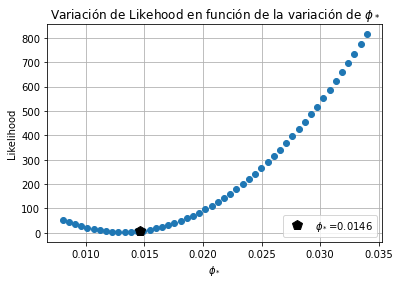

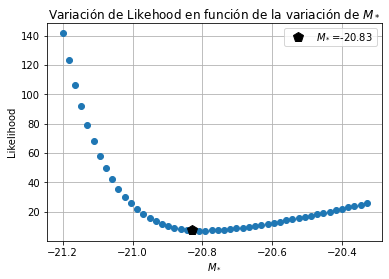

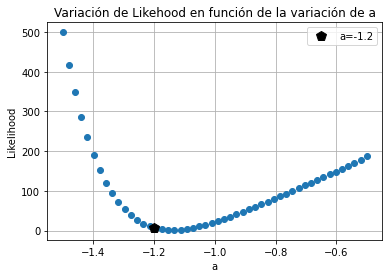

In [20]:
#Quiero corroborar si la variación de cada parámetro en el intervalo considerado minimiza a la función Likelihood coincidiendo además con los valores de Blanton
#𝜙∗ =[0.008,0.034]; 𝑀∗ =[-21.22,-20.33]; 𝛼=[-3.33,1.11]
#Blanton 𝜙∗=h=0.0146, 𝑀∗=m=-20.83, 𝛼=k=-1.2

h=np.linspace(0.008,0.034,50)
m=np.linspace(-21.2,-20.33,50)
#k=np.linspace(-3.33,1.11,50)
k=np.linspace(-1.5,-0.5,50)
u =[]
w=[]
z=[]
for i in range(50):
    u.append(likelihood(x,y,h[i],-20.83,-1.2,sigma))
for i in range(50):
    w.append(likelihood(x,y,0.0146,m[i],-1.2,sigma))
for i in range(50):
    z.append(likelihood(x,y,0.0146,-20.83,k[i],sigma))

plt.plot(h,u,'o')
plt.plot(0.0146,likelihood(x,y,0.0146,-20.83,-1.2,sigma),'p', color='k',markersize = 10, label='$\phi_*$=0.0146')
#plt.xlim(0.005,0.035)
plt.title('Variación de Likehood en función de la variación de $\phi_*$')
plt.ylabel('Likelihood')
plt.xlabel('$\phi_*$')
plt.legend(loc='lower right',fontsize=10)
plt.grid()
plt.show()
plt.plot(m,w,'o')
plt.plot(-20.83,likelihood(x,y,0.0146,-20.83,-1.2,sigma),'p', color='k',markersize = 10, label='$M_*$=-20.83')
#plt.ylim(-50,300)
plt.title('Variación de Likehood en función de la variación de $M_*$')
plt.ylabel('Likelihood')
plt.xlabel('$M_*$')
plt.legend(fontsize=10)
plt.grid()
plt.show()
plt.plot(k,z,'o')
plt.plot(-1.2,likelihood(x,y,0.0146,-20.83,-1.2,sigma),'p', color='k',markersize = 10, label='a=-1.2')
plt.title('Variación de Likehood en función de la variación de a')
plt.ylabel('Likelihood')
plt.xlabel('a')
plt.legend(fontsize=10)
plt.grid()
plt.show()

Se observa que el mínimo de la curva se aproxima al valor del parámetro de Blanton, lo que nos indica que en el intervalo de los parámetros elegidos estamos minimizando el Likelihood como queremos y que el valor de cada párametro será cercano a los elegidos por Blanton.

Implementamos el algoritmo de Metrópolis-Hastings (M-H) para explorar el espacio de parámetros y determinar cuales son los mejores parámetros para el modelo que se ajustará a los datos.

El mecánismo de M-H es el siguiente:

* Tomamos un estado inicial $x_{0}$
* Establecemos $t=0$
* Se itera cuantas veces queramos haciendo:
    * Un estado candidato x' siguiendo $g(x'|x_{t})$
    * Calculamos la probabilidad de aceptación $A(x',x_{t})=\min \left(1,{\frac {P(x')}{P(x_{t})}}{\frac {g(x_{t}|x')}{g(x'|x_{t})}}\right)$. Si se acepta derecho lo tomamos como el nuevo x', si no arrojamos un dado para determinar si nos quedaremos con el.
    * Sorteo de aceptación o rechazo:
        * Generamos un número aleatorio uniforme $u\in [0,1]$
        * Si $u\leq A(x',x_{t})$, se acepta el nuevo estado y se toma $x_{t+1}=x'$
        * Si $u>A(x',x_{t})$, se rechaza el nuevo estado y se toma el viejo estado $x_{t+1}=x_{t}$
    * Incrementamos $t=t+1$

In [21]:
#armo cadena M-H

#def funcMetrop(x,y,phi0,m0,alpha0,sigma):
#    
#    #primero defino que mis parámetros iniciales esten dentro del cubo de limites aceptados por la funcion priors
#    matriz=np.zeros((1000,3)) #matriz de 1000 filas (saltos) y 3 columnas (una columna por cada parámetro)
#    if priors(phi0,m0,alpha0) == 0:
#        matriz[0][0]=phi0
#        matriz[0][1]=m0
#        matriz[0][2]=alpha0
#    else:
#        print('Los parámetros iniciales no pertenecen a los límites considerados')
#        return none    
#    return matriz
#
##verificación primera parte
#funcMetrop(x,y,0.014,-21,-1.2,sigma)         

In [22]:
#cadena M-H
def funcMetrop(x,y,h,m,k,sigma):

    #primero defino que mis parámetros iniciales esten dentro del cubo de límites aceptados por la función priors
    matriz=np.zeros((2000,3)) #matriz de 1000 filas (saltos) y 3 columnas (una columna por cada parámetro)
    if priors(h,m,k) == 0:
        #guardo mis parámetros iniciales en matriz
        matriz[0][0]=h
        matriz[0][1]=m
        matriz[0][2]=k
    else:
        print('Los parámetros iniciales no pertenecen a los límites considerados')
        return (None)  
  
    g =[]
    poster=[] 
    #salto desde el parámetro inicial dentro de la matriz
    for i in range(1999):
        postold=posterior(x,y,matriz[i][0],matriz[i][1],matriz[i][2],sigma)
        poster.append(postold)
        
        matriz[i+1][0] = matriz[i][0] + ((np.random.rand()*2.0)-1.0)*((limsup[0]-liminf[0])/50)   #randon I=[-1,1] tq salto máximo tenga el tamaño limsup[i]-liminf[i])/50
        matriz[i+1][1] = matriz[i][1] + ((np.random.rand()*2.0)-1.0)*((limsup[1]-liminf[1])/50)
        matriz[i+1][2] = matriz[i][2] + ((np.random.rand()*2.0)-1.0)*((limsup[2]-liminf[2])/50)
    
        #veremos si los aceptamos o no
        #primero vemos si el nuevo p' está dentro de los límites de cada parámetro
        if priors(matriz[i+1][0],matriz[i+1][1],matriz[i+1][2]) == 0:
            #calculo el posterior al nuevo x' y la diferencia entre el post de x y x'
            postnew =posterior(x,y,matriz[i+1][0],matriz[i+1][1],matriz[i+1][2],sigma)
            dif = postold - postnew #quiero minimizar, por lo tanto postold>postnew => dif>0
            g.append(dif) 
            if dif>=0:
                continue #aca acepto punto y continua en el for 
                
            else:
                dif=np.exp(dif)
                a = np.random.random()
                
                if a < dif:
                    continue #acepta punto
                else:
                    matriz[i+1][0] = matriz[i][0] 
                    matriz[i+1][1] = matriz[i][1]
                    matriz[i+1][2] = matriz[i][2]
        else:
            matriz[i+1][0] = matriz[i][0] 
            matriz[i+1][1] = matriz[i][1]
            matriz[i+1][2] = matriz[i][2]
          
    return (matriz,g,poster)

In [23]:
#𝜙∗ =[0.008,0.034]; 𝑀∗ =[-21.22,-20.33]; 𝛼=[-3.33,1.11]
#Blanton h=0.0146, m=-20.83, k=-1.2

In [24]:
#funcMetrop(x,y,0.009,-20.5,-0.9,sigma)[1]

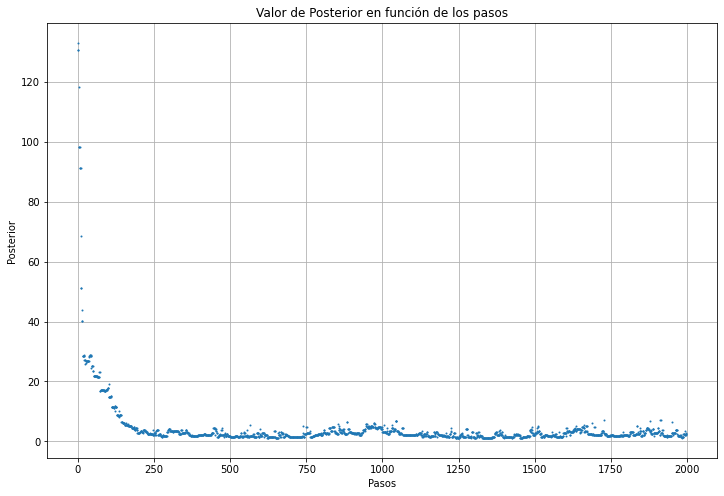

In [25]:
#grafico la posterior en función de los pasos
pos = funcMetrop(x,y,0.009,-20.5,-0.9,sigma)[2]
plt.figure(figsize = (12,8))
plt.plot(pos,'o',markersize = 1)
plt.title('Valor de Posterior en función de los pasos')
plt.ylabel('Posterior')
plt.xlabel('Pasos')
plt.grid()
plt.show()

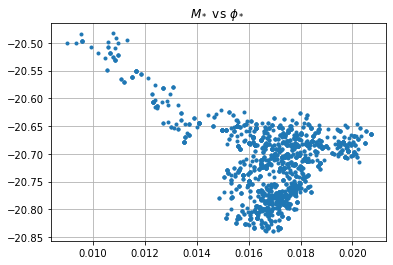

In [26]:
#graficos proyectando dimensiones para explorar mejor el espacio de parámetros y visualizar posibles correlaciones
mat = funcMetrop(x,y,0.009,-20.5,-0.9,sigma)[0]
plt.plot(mat[:,0],mat[:,1],'.')
plt.title('$M_* $ vs $\phi_*$ ')
plt.grid()
plt.show()

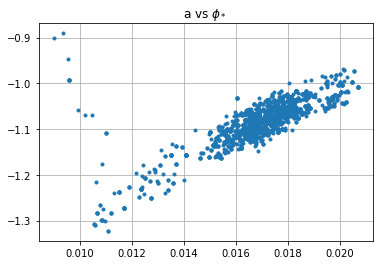

In [27]:
plt.plot(mat[:,0],mat[:,2],'.')
plt.title('a vs $\phi_*$ ')
plt.grid()
plt.show()

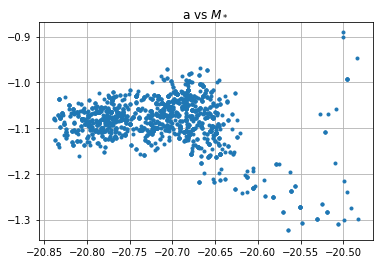

In [28]:
plt.plot(mat[:,1],mat[:,2],'.')
plt.title('a vs $M_*$ ')
plt.grid()
plt.show()

In [29]:
#Blanton h=0.0146, m=-20.83, k=-1.2

Observamos que a partir del paso 400 el valor del Posterior tiende a moverse aleatoriamente alrededor un valor mínimo. Por lo cual calculamos de la matriz de los parámetros el valor medio y la desviación estandar de cada uno.

In [30]:
hmed = np.mean(mat[400:,0])
hdesv = np.std(mat[400:,0])
mmed = np.mean(mat[400:,1])
mdesv = np.std(mat[400:,1])
kmed = np.mean(mat[400:,2])
kdesv = np.std(mat[400:,2])

print('valor medio de h=', hmed, ' ; desviación estandar de h=',hdesv)
print('valor medio de m=', mmed,' ; desviación estandar de m=',mdesv)
print('valor medio de k=',kmed,' ; desviación estandar de k=',kdesv)

valor medio de h= 0.017401880974917024  ; desviación estandar de h= 0.0011671324686558116
valor medio de m= -20.722625934508507  ; desviación estandar de m= 0.05115664539726032
valor medio de k= -1.0720824273554832  ; desviación estandar de k= 0.033957895858053824


Por lo tanto obtenemos que los valores de cada parámetro son:
$\phi_*$=(0.017 $\pm$ 0.002);
$M_*$=(-20.75 $\pm$ 0.08);
$\alpha$=(-1.09 $\pm$ 0.05)

* OBS: estos valores se obtuvieron cuando ejecute el programa, pueden variar por el random

Se observa que para $M_*$ el valor encontrado coincide con el de Blanton, mientras los otros dos parámetros tienen valores cercanos pero no coinciden con ellos. 
* OBS: estos valores se obtuvieron cuando ejecute el programa, pueden variar por el random

Para visualizar las propiedades de convergencia de la cadena impusimos condiciones iniciales a la simulación, realizamos varias cadenas y las comparamos. 
En primer lugar generamos un mezclado de las mismas sorteando los parámetros de tal manera que se corra todo el intervalo encontrado anteriormente. Luego generamos otro mezclado pero acotando el intervalo del posible random sorteado, es decir, tomamos un subconjunto de cada intervalo y sorteamos los valores de los parámetros.

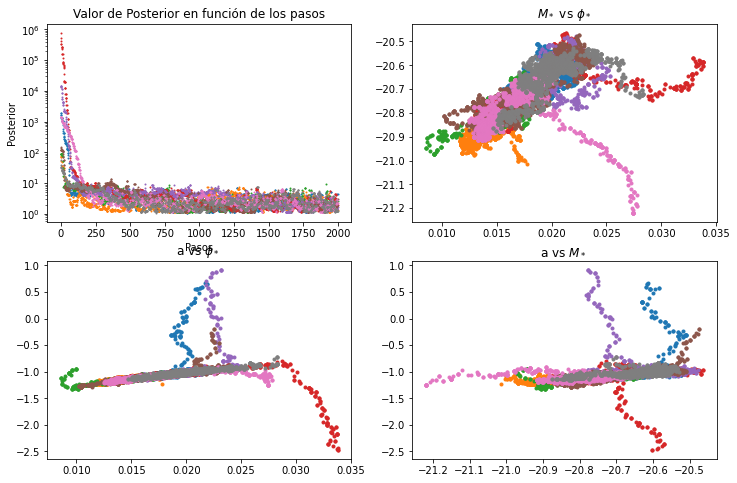

In [31]:
#mezclado corriendo todo el intervalo
#𝜙∗ =[0.008,0.034]; 𝑀∗ =[-21.22,-20.33]; 𝛼=[-3.33,1.11]

#o=[]
pos1=[]
mat1=[]
plt.figure(figsize = (12,8))
for i in range(8):
    h=np.random.random()*(0.026)+0.008 
    m=np.random.random()*(0.89)-21.22
    k=np.random.random()*(4.44)-3.33
    
    #o.append(k)
#o
    pos = funcMetrop(x,y,h,m,k,sigma)[2]
    mat = funcMetrop(x,y,h,m,k,sigma)[0]
    pos1.append(pos)
    mat1.append(mat)

    plt.subplot(2,2,1)
    plt.plot(pos1[i],'o',markersize = 1)
    plt.title('Valor de Posterior en función de los pasos')
    plt.ylabel('Posterior')
    plt.xlabel('Pasos')
    plt.grid()
    plt.yscale('log')

    
    plt.subplot(2,2,2)
    plt.plot(mat1[i][:,0],mat1[i][:,1],'.')
    plt.title('$M_* $ vs $\phi_*$')
    plt.grid()


    plt.subplot(2,2,4)
    plt.plot(mat1[i][:,1],mat1[i][:,2],'.')
    plt.title('a vs $M_*$ ')
    plt.grid()
    


    plt.subplot(2,2,3)
    plt.plot(mat1[i][:,0],mat1[i][:,2],'.')
    plt.title('a vs $\phi_*$ ')
    plt.grid()
plt.show()


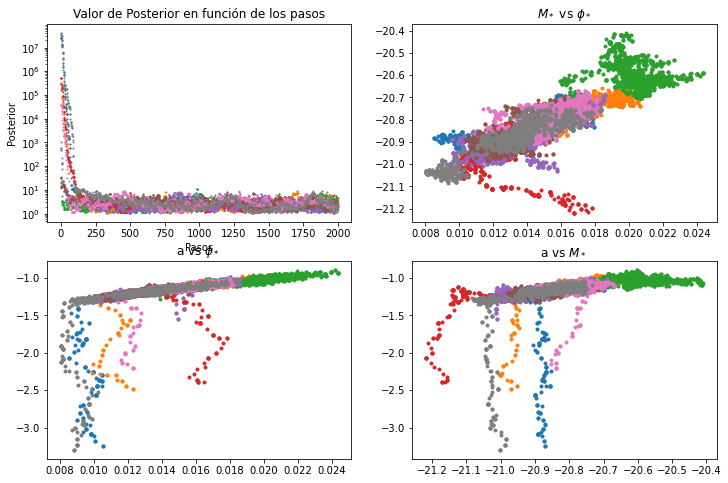

In [32]:
#mezclado corriendo un subconjunto del intervalo
#𝜙∗ =[0.008,0.034]; 𝑀∗ =[-21.22,-20.33]; 𝛼=[-3.33,1.11]

#o=[]
pos2=[]
mat2=[]
plt.figure(figsize = (12,8))
for i in range(8):
    h=np.random.random()*(0.01)+0.008 
    m=np.random.random()*(0.40)-21.22
    k=np.random.random()*(2.22)-3.33
    #o.append(k)
#o
    pos = funcMetrop(x,y,h,m,k,sigma)[2]
    mat = funcMetrop(x,y,h,m,k,sigma)[0]
    pos2.append(pos)
    mat2.append(mat)

    plt.subplot(2,2,1)
    plt.plot(pos2[i],'o',markersize = 1)
    plt.title('Valor de Posterior en función de los pasos')
    plt.ylabel('Posterior')
    plt.xlabel('Pasos')
    plt.grid()
    plt.yscale('log')
    
    plt.subplot(2,2,2)
    plt.plot(mat2[i][:,0],mat2[i][:,1],'.')
    plt.title('$M_* $ vs $\phi_*$')
    plt.grid()
    
    plt.subplot(2,2,3)
    plt.plot(mat2[i][:,0],mat2[i][:,2],'.')
    plt.title('a vs $\phi_*$ ')
    plt.grid()
    
    
    plt.subplot(2,2,4)
    plt.plot(mat2[i][:,1],mat2[i][:,2],'.')
    plt.title('a vs $M_*$ ')
    plt.grid()
    
plt.show()

Comparamos las condiciones de cada cadena haciendo un gráfico de los parámetro en función de los pasos.

In [33]:
#mat1[0]

In [34]:
#mat1[0][:,0]

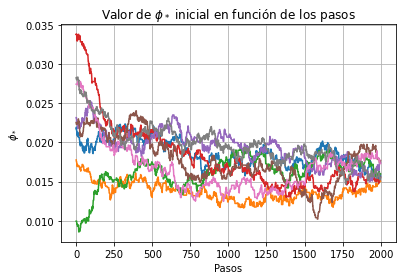

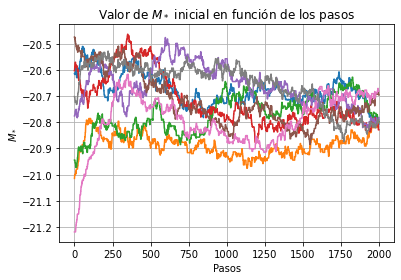

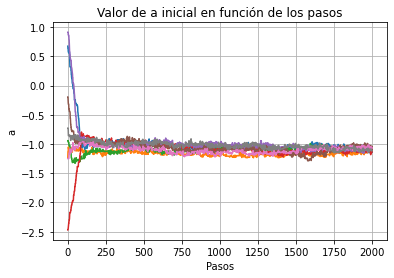

In [35]:
#mezclado corriendo todo el intervalo
for i in range(8):
    plt.plot(mat1[i][:,0],'-')
    plt.title('Valor de $\phi_*$ inicial en función de los pasos')
    plt.ylabel('$\phi_*$')
    plt.xlabel('Pasos')
plt.grid()
plt.show()

for i in range(8):
    plt.plot(mat1[i][:,1],'-')
    plt.title('Valor de $M_*$ inicial en función de los pasos')
    plt.ylabel('$M_*$')
    plt.xlabel('Pasos')
plt.grid()
plt.show()

for i in range(8):
    plt.plot(mat1[i][:,2],'-')
    plt.title('Valor de a inicial en función de los pasos')
    plt.ylabel('a')
    plt.xlabel('Pasos')
plt.grid()
plt.show()

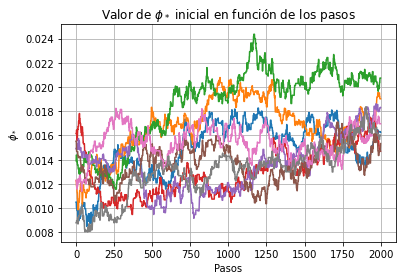

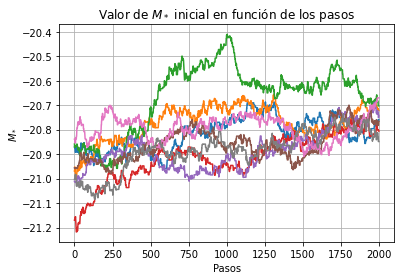

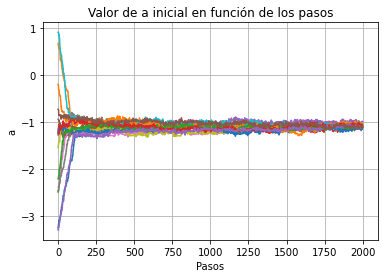

In [36]:
#mezclado corriendo un subconjunto del intervalo
for i in range(8):
    plt.plot(mat2[i][:,0],'-')
    plt.title('Valor de $\phi_*$ inicial en función de los pasos')
    plt.ylabel('$\phi_*$')
    plt.xlabel('Pasos')
plt.grid()
plt.show()

for i in range(8):
    plt.plot(mat2[i][:,1],'-')
    plt.title('Valor de $M_*$ inicial en función de los pasos')
    plt.ylabel('$M_*$')
    plt.xlabel('Pasos')
plt.grid()
plt.show()

for i in range(8):
    plt.plot(mat2[i][:,2],'-')
    plt.plot(mat1[i][:,2],'-')
    plt.title('Valor de a inicial en función de los pasos')
    plt.ylabel('a')
    plt.xlabel('Pasos')
plt.grid()
plt.show()

Se puede ver que el segundo código implica un mal mezclado, porque si bien convergen las cadenas, por pertenecer a un rango mas acotado de del intervalo los parámetros inician aproximadamente desde un mismo valor, mientras que para el primer mezclado cada parámetro barre su intervalo de posibles valores. Concluimos entonces que la primera con las condiciones dadas representan un buen mezclado de las cadenas. 

Finalizamos por lo tanto esta sección graficando los datos y el modelo con los parámetros que se encontraron:

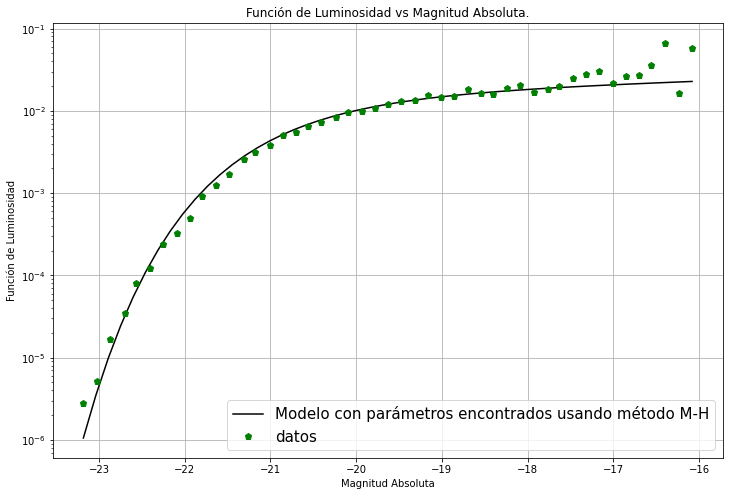

In [37]:
#gráfico de datos con modelo el cual posee los parámetros encontrados
#$h=(0.017 +- 0.002);
#m=(-20.75 +- 0.08);
#k=(-1.09 +- 0.05)
#OBS: estos valores se obtuvieron cuando ejecute el programa, pueden variar por el random

#rango de x
sx = np.linspace(min(x),max(x))
#valores de este trabajo encontrados con método M-H 
sy = model(sx, h=0.017, m=-20.75, k=-1.09)
plt.figure(figsize = (12,8))
plt.plot(sx,sy,color='k', label='Modelo con parámetros encontrados usando método M-H')
plt.plot(x,y,'p', color='g', label='datos', ms=7)
plt.yscale('log')
plt.title('Función de Luminosidad vs Magnitud Absoluta.')
plt.ylabel('Función de Luminosidad')
plt.xlabel('Magnitud Absoluta')
plt.legend(loc='lower right',fontsize=15)
plt.grid()
plt.show()

#### 2.2. Análisis mediante Gradiente Descendente.

A continuación implementaremos el método de gradiente descendente para encontrar el mínimo de Likelihood utilizando derivadas parciales y derivando respecto a cada uno de los parámetros. Este método nos devolverá de manera mas directa los párametros que son buenos para el modelo sin inspeccionar el espacio de parámetros.

El algoritmo de gradiende descendente es iterativo y requiere que el usuario introduzca dos siguientes parámetros:

* El número de iteraciones
* La tasa de aprendizaje, conocido como el parámetro $\epsilon$. Este definirá la dimensión de los saltos requerida para que el algoritmo encuentre  el mínimo de la función
* Una vez definidos estos dos parámetros, el algoritmo procede de la siguiente manera:
    * Se escoge de forma aleatoria el valor inicial de la variable w
    * En cada iteración actualiza el valor de w usando la siguiente ecuación: w ← w - α * gradiente
    * Se repite el paso anterior hasta completar el número de iteraciones definido por el usuario.

In [38]:
#definimos cada una de las derivadas parciales de la función Likelihood

In [39]:
#cte=2/sigma**2
def derivpar_h(x,model,h,m,k,sigma):
    v=[]
    for i in range(len(x)):
        d_h=-((2/(h*((sigma[i])**2)))*(y[i]-model(x,h,m,k)[i])*(model(x,h,m,k)[i]))
        v.append(d_h)
    l=np.sum(v)
    return l


In [40]:
#prueba
#derivpar_h(x,model,0.0146,-20.83,-1.2,sigma)

In [41]:
def derivpar_m(x,model,h,m,k,sigma):
    u=[]
    for i in range(len(x)):
        g=-0.4*(x-m)
        d_m=-((2/(sigma[i]**2))*(y[i]-model(x,h,m,k)[i])*model(x,h,m,k)[i])*10*np.log(10)*g[i]
        u.append(d_m)
    e=np.sum(u)
    return e

In [42]:
#prueba
#derivpar_m(x,model,0.0146,-20.83,-1.2,sigma)

In [43]:
def derivpar_k(x,model,h,m,k,sigma):
    n=[]
    for i in range(len(x)):
        g=-0.4*(x-m)
        d_k=-((2/(sigma[i]**2))*(y[i]-model(x,h,m,k)[i])*model(x,h,m,k)[i])*np.log(10)*0.4*(k+1-10**(g[i]))
        n.append(d_k)
    t=np.sum(n)
    return t

In [44]:
#prueba
#derivpar_k(x,model,0.0146,-20.83,-1.2,sigma)

In [45]:
#calculamos el módulo del gradiente
def modgrad(x,model,h,m,k,sigma):
    modgrad=((derivpar_h(x,model,h,m,k,sigma))**2+(derivpar_m(x,model,h,m,k,sigma))**2+(derivpar_k(x,model,h,m,k,sigma))**2)**(1/2)
    return modgrad

In [46]:
#prueba
#modgrad(x,model,0.0146,-20.83,-1.2,sigma)

In [47]:
#calculamos los versores
def versor_h(x,model,h,m,k,sigma):
    hver=(derivpar_h(x,model,h,m,k,sigma))/(modgrad(x,model,h,m,k,sigma))
    return hver
def versor_m(x,model,h,m,k,sigma):
    mver=(derivpar_m(x,model,h,m,k,sigma))/(modgrad(x,model,h,m,k,sigma))
    return mver
def versor_k(x,model,h,m,k,sigma):
    kver=(derivpar_m(x,model,h,m,k,sigma))/(modgrad(x,model,h,m,k,sigma))
    return kver

In [48]:
#prueba
#versor_h(x,model,0.0146,-20.83,-1.2,sigma)

In [49]:
#prueba
#versor_m(x,model,0.0146,-20.83,-1.2,sigma)

In [50]:
#prueba
#versor_k(x,model,0.0146,-20.83,-1.2,sigma)

In [51]:
#defino el gradiente
def grad(x,model,h,m,k,sigma):
    grad=(derivpar_h(x,model,h,m,k,sigma),derivpar_m(x,model,h,m,k,sigma),derivpar_k(x,model,h,m,k,sigma))
    return grad

In [52]:
#prueba
#grad(x,model,0.0146,-20.83,-1.2,sigma)

In [53]:
#defino los versores del gradiente
def vergrad(x,model,h,m,k,sigma):
    vergrad=[((derivpar_h(x,model,h,m,k,sigma))/(modgrad(x,model,h,m,k,sigma))),((derivpar_m(x,model,h,m,k,sigma))/(modgrad(x,model,h,m,k,sigma))),((derivpar_k(x,model,h,m,k,sigma))/(modgrad(x,model,h,m,k,sigma)))]
    return vergrad

In [54]:
#prueba
vergrad(x,model,0.0146,-20.83,-1.2,sigma)

[0.9311354469308162, -0.36466209658173787, -0.0028870028681248342]

In [55]:
#versores para distintos parametros 
hola=[]
for i in range(50):
    h=np.linspace(0.008,0.034)
    k=np.linspace(-1.5,-0.5)
    m=np.linspace(-21.2,-20.33)
    hola.append(vergrad(x,model,h[i],m[i],k[i],sigma))
#hola

In [56]:
#le doy de comer un valor inicial dentro de los parametros y evaluo el gradiente, siguiendo de este le doy otro valor y le calculo el gradiente (es decir, aplico el algoritmo)

$\phi_*$=[0.008,0.034];
$M_*$=[-21.22,-20.33];
$\alpha$=[-3.33,1.11]

In [57]:
vergrad(x,model,0.025,-20,1,sigma)

[0.9247109320352982, 0.37753142985125837, -0.04878228827017418]

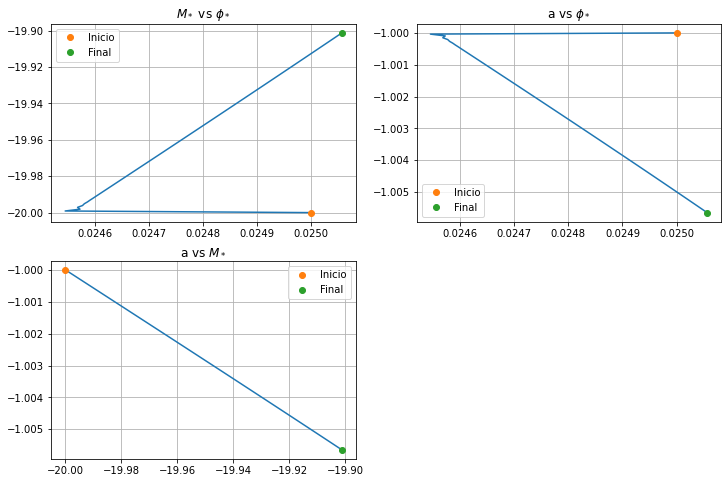

Con los parámetros iniciales h=0.025,m=-20,k=-1, obtenemos mediante el método del gradiente descendente que
valor de h= 0.025056190824212593
valor de m= -19.90127245875809
valor de k= -1.0056495343784442


In [58]:
#valores iniciales h=0.025,m=-20,k=-1
plt.figure(figsize = (12,8))
N=100
r_in=np.zeros((N,3))
r_in[0,0]=0.025
r_in[0,1]=-20
r_in[0,2]=-1
for i in range(1,N):
    hola=vergrad(x,model,r_in[i-1,0],r_in[i-1,1],r_in[i-1,2],sigma)
    r_in[i]=r_in[i-1]-0.001*np.array(hola)
#r_in

plt.subplot(2,2,1)
plt.plot(r_in[:,0],r_in[:,1])
plt.plot(r_in[0,0],r_in[0,1],'o', label='Inicio')
plt.plot(r_in[99,0],r_in[99,1],'o', label='Final')
plt.title('$M_*$ vs $\phi_*$')
plt.legend()
plt.grid()
    
plt.subplot(2,2,2)
plt.plot(r_in[:,0],r_in[:,2])
plt.plot(r_in[0,0],r_in[0,2],'o', label='Inicio')
plt.plot(r_in[99,0],r_in[99,2],'o', label='Final')
plt.title('a vs $\phi_*$')
plt.legend()
plt.grid()
    
plt.subplot(2,2,3)
plt.plot(r_in[:,1],r_in[:,2])
plt.plot(r_in[0,1],r_in[0,2],'o', label='Inicio')
plt.plot(r_in[99,1],r_in[99,2],'o', label='Final')
plt.title('a vs $M_*$')
plt.legend()
plt.grid()
    
plt.show()

print('Con los parámetros iniciales h=0.025,m=-20,k=-1, obtenemos mediante el método del gradiente descendente que')
print('valor de h=',r_in[99,0])
print('valor de m=', r_in[99,1])
print('valor de k=', r_in[99,2]) 

Conseguimos por lo tanto valores cercanos a los elegidos por Blanton.


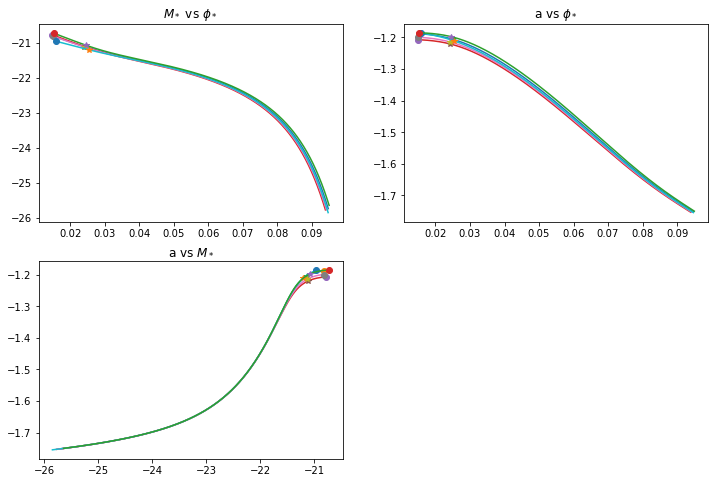

In [73]:
#aplicamos el algoritmo pero sorteamos los valores iniciales
matt=[]
h_var=[]
m_var=[]
k_var=[]
plt.figure(figsize = (12,8))
for j in range(5): #hago 5 semillas iniciales 
    N=1000
    r_in=np.zeros((N,3))
    r_in[0,0]= 0.0146 + np.random.normal(scale=0.001)
    r_in[0,1]= -20.83 + np.random.normal(scale=0.1)
    r_in[0,2]= -1.20 + np.random.normal(scale=0.01)  
    
    for i in range(1,N):
        hola=vergrad(x,model,r_in[i-1,0],r_in[i-1,1],r_in[i-1,2],sigma)
        #norm=np.linalg.norm(grad)
        r_in[i]=r_in[i-1]+[0.0001,0.01,0.01]*np.array(hola)
    

    #r_in
    matt.append(r_in)

    h_var.append(matt[j][99,0])
    m_var.append(matt[j][99,1])
    k_var.append(matt[j][99,2])
    
    plt.subplot(2,2,1)
    plt.plot(matt[j][:,0],matt[j][:,1])
    plt.plot(matt[j][0,0],matt[j][0,1],'o', label='Inicio')
    plt.plot(matt[j][99,0],matt[j][99,1],'*',label='Final')
    plt.title('$M_*$ vs $\phi_*$')
    #plt.legend()
    #plt.grid()
    
    plt.subplot(2,2,2)
    plt.plot(matt[j][:,0],matt[j][:,2])
    plt.plot(matt[j][0,0],matt[j][0,2],'o', label='Inicio')
    plt.plot(matt[j][99,0],matt[j][99,2],'*')
    plt.title('a vs $\phi_*$')
    #plt.legend()
    #plt.grid()
    
    plt.subplot(2,2,3)
    plt.plot(matt[j][:,1],matt[j][:,2])
    plt.plot(matt[j][0,1],matt[j][0,2],'o', label='Inicio')
    plt.plot(matt[j][99,1],matt[j][99,2],'*', label='Final')
    plt.title('a vs $M_*$')
    #plt.legend()
    #plt.grid()
    

plt.show()


In [74]:
h_var

[0.02474158483393819,
 0.024131758863269553,
 0.024344701309716735,
 0.025348979546116694,
 0.024476518135686753]

In [61]:
#Blanton h=0.0146, m=-20.83, k=-1.2

Se observa que el gradiente converja a un mismo punto en los tres gráficos como esperabamos. Para determinar que valores de parámetros finales estamos obteniendo tomamos la media y desviación estandar de los 8 valores finales de la lista de matrices.

In [75]:
hmedgrad = np.mean(h_var)
hdesvgrad = np.std(h_var)
mmedgrad = np.mean(m_var)
mdesvgrad = np.std(m_var)
kmedgrad = np.mean(k_var)
kdesvgrad = np.std(k_var)

print('valor medio de h con el método de gradiente descendente', hmedgrad, 'y su desviación estandar', hdesvgrad)
print('valor medio de m con el método de gradiente descendente', mmedgrad, 'y su desviación estandar', mdesvgrad)
print('valor medio de k con el método de gradiente descendente', kmedgrad,'y su desviación estandar', kdesvgrad)


valor medio de h con el método de gradiente descendente 0.024608708537745584 y su desviación estandar 0.0004195979949321469
valor medio de m con el método de gradiente descendente -21.132077865744513 y su desviación estandar 0.04238708966518766
valor medio de k con el método de gradiente descendente -1.2095720036178823 y su desviación estandar 0.007883708443490896


Por lo tanto obtenemos que los valores de cada parámetro son:
$\phi_*$=(0.0246 $\pm$ 0.0004);
$M_*$=(-21.13 $\pm$ 0.04);
$\alpha$=(-1.209 $\pm$ 0.008)

* OBS: estos valores se obtuvieron cuando ejecute el programa, pueden variar por el random

Se observa que para $M_*$  y $\alpha$  el valor encontrado, considerando los errores, coinciden con el de Blanton, mientras que para $\phi_*$ el valor encontrado es un orden de magnitud menor que el tomado por Blanton.
* OBS: estos valores se obtuvieron cuando ejecute el programa, pueden variar por el random

Con estos parámetros el modelo se ajusta de la siguiente manera a los datos:

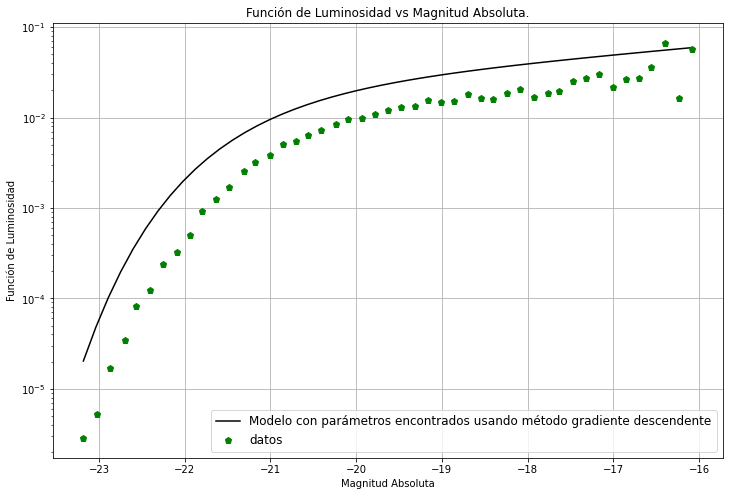

In [76]:
#gráfico de datos con modelo el cual posee los parámetros encontrados mediante el algoritmo del gradiente descendente
#h=(0.002 +- 0.002);
#m=(-20.8 +- 0.2);
#k=(-1 +- 1)
#OBS: estos valores se obtuvieron cuando ejecute el programa, pueden variar por el random

#rango de x
sx = np.linspace(min(x),max(x))
#valores de este trabajo encontrados con método M-H 
#sy = model(sx, h=0.002, m=-20.8, k=-1)
sy = model(sx, h=0.0246, m=-21.13, k=-1.209)
plt.figure(figsize = (12,8))
plt.plot(sx,sy,color='k', label='Modelo con parámetros encontrados usando método gradiente descendente')
plt.plot(x,y,'p', color='g', label='datos', ms=7)
plt.yscale('log')
plt.title('Función de Luminosidad vs Magnitud Absoluta.')
plt.ylabel('Función de Luminosidad')
plt.xlabel('Magnitud Absoluta')
plt.legend(loc='lower right',fontsize=12)
plt.grid()
plt.show()

Claramente el ajuste no es bueno debido a que los valores que obtuvimos para los parámetros difieren a los de Blanton.

### 3. Conclusión.

Los métodos Bayesianos,implementados usando las Cadenas de Markov Monte Carlo (MCMC), proveen una manera poderosa de estimar los parámetros de un modelo.

Blanton en su trabajo obtuvo que los parámetros están dados por:
* $\phi_*$=(0.0146 $\pm$ 0.012)
* $M_*$=(-20.83 $\pm$ 0.03)
* $\alpha$=(-1.20 $\pm$ 0.03)

Los valores de los parámetros encontrados con el método M-H son:
* $\phi_*$=(0.017 $\pm$ 0.002)
* $M_*$=(-20.75 $\pm$ 0.08)
* $\alpha$=(-1.09 $\pm$ 0.05)

Mientras que con el algoritmo del gradiente descendente obtuvimos que:
* $\phi_*$=(0.0246 $\pm$ 0.0004)
* $M_*$=(-21.13 $\pm$ 0.04)
* $\alpha$=(-1.209 $\pm$ 0.008)

OBS: estos valores, para ambos métodos, se obtuvieron cuando ejecute el programa. Esto implica que pueden variar al volver a correrlo por el np.random de determinadas celdas.

Tenemos por lo tanto que para el método M-H el valor de $\phi_*$ es comparable con el valor determinado por Blanton, mientras que para los parámetros $M_*$ y $\alpha$, ninguno de los algoritmos se solapa con los valores encontrados por Blanton. 

Una diferencia de ambos métodos es que el algoritmo de M-H nos da mas información del espacio de parámetros determinando, por ejemplo, que los mismos estan correlacionados (ver gráficos de celdas [29], [30] y [31]), mientras que el gradiente descendente, por su funcionalidad, cae al valor del mínimo local de manera más directa. La desventaja de este último recide en que puede encontrarse con un mínimo secundario y establecer allí que se encuentran los parámetros ideales para el modelo. 

Por último observamos que en ambos casos se logró ajustar la función de Schechter a la función de luminosidad de galaxias obtenida por Blanton et al. (2001). Se nota que el valor del parámetro $\phi_*$ es muy sensible, y como el mismo se encarga de varíar la altura a la que se posiciona el modelo respecto de los datos, el ajuste no es el ideal.